<a href="https://colab.research.google.com/github/YuliiaUtkina/Git_modul_pyhton/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [2]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 21.9 MB/s eta 0:00:00


! conda list | grep mysql-connector-python

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [3]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

In [4]:
con = mysql.connector.connect(user='user1',password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

In [8]:
dir(cursor)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_affected_rows',
 '_batch_insert',
 '_buffered',
 '_check_executed',
 '_cnx',
 '_description',
 '_execute_iter',
 '_executed',
 '_executed_list',
 '_fetch_warnings',
 '_handle_eof',
 '_handle_result',
 '_handle_resultset',
 '_handle_warnings',
 '_last_insert_id',
 '_nextrow',
 '_raw',
 '_raw_as_string',
 '_rowcount',
 '_stored_results',
 '_warning_count',
 '_warnings',
 'add_attribute',
 'arraysize',
 'callproc',
 'clear_attributes',
 'close',
 'column_names',
 'description',
 'execute',
 'executem

In [5]:
cursor = con.cursor()
query = """
SELECT max(hire_date) as max_date, min(hire_date) as min_date
FROM employees
"""
cursor.execute(query)
result = cursor.fetchall()
print(result)


[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]


3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [6]:
import pandas as pd

query = """
SELECT emp_no, salary, from_date, to_date
FROM salaries
WHERE (emp_no, to_date) IN (
    SELECT emp_no, MAX(to_date)
    FROM salaries
    GROUP BY emp_no
)
ORDER BY emp_no;
"""
cursor.execute(query)
result = cursor.fetchall()
res = pd.DataFrame(result, columns=[desc[0] for desc in cursor.description])

In [7]:
field_names = [i[0] for i in cursor.description]

In [8]:
print(res.columns)
print("Розмір DataFrame", res.shape)
print(res.head(3))

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')
Розмір DataFrame (300180, 4)
   emp_no  salary   from_date     to_date
0   10001   88958  2002-06-22  9999-01-01
1   10002   72527  2001-08-02  9999-01-01
2   10003   43311  2001-12-01  9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [12]:
print(res['to_date'].dtype)


object


In [19]:
print(res['to_date'].apply(type).unique())

[<class 'datetime.date'>]


In [15]:
future_date = datetime.date(9999, 1, 1)
# Підрахунок кількості значень, які дорівнюють '9999-01-01'
count_future_date = (res['to_date'] == future_date).sum()

# Підрахунок кількості значень, які не дорівнюють '9999-01-01'
count_other_date = (res['to_date'] != future_date).sum()

In [16]:
print(f"Кількість співробітників з 'to_date' рівним '9999-01-01': {count_future_date}")
print(f"Кількість співробітників з 'to_date' не рівним '9999-01-01': {count_other_date}")

Кількість співробітників з 'to_date' рівним '9999-01-01': 240124
Кількість співробітників з 'to_date' не рівним '9999-01-01': 60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

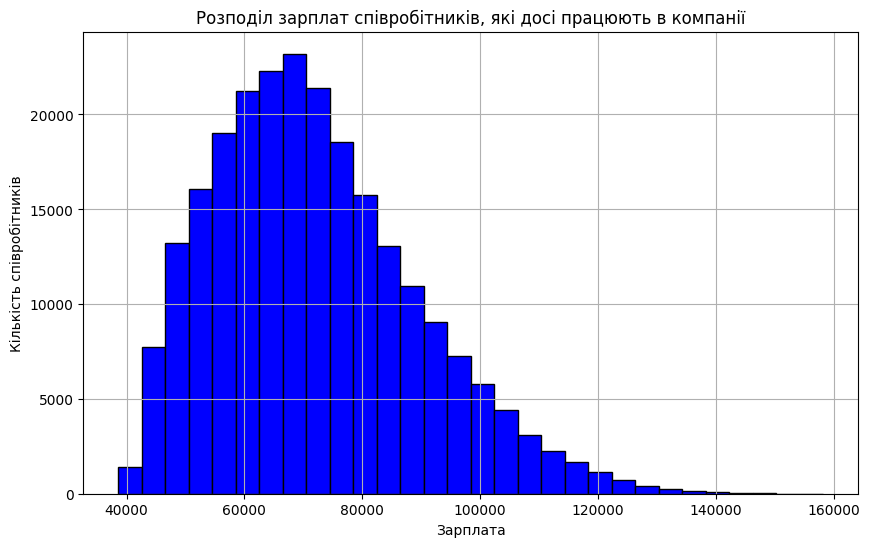

In [26]:
import datetime
import matplotlib.pyplot as plt

current_employees = res[res['to_date'] == future_date]

# Візуалізація
plt.figure(figsize=(10, 6))
plt.hist(current_employees['salary'], bins=30, color='blue', edgecolor='black')
plt.title('Розподіл поточних зарплат в компанії')
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників')
plt.grid(True)
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [28]:
con.close()